In [ ]:
#Utilizzare il dataset covid-19-data
''' 1. Si richiede di verificare le dimensioni del dataset e i relativi metadati 
    2. Si chiede di trovare, per ogni continente: 
        a. il numero di casi fin dall'inizio della pandemia    
        b. la percentuale rispetto al totale mondiale del numero di casi 
    3. Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati: 
        a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
        b. il numero di nuovi casi rispetto alla data
    4. Riguardo le nazioni di Italia, Germania e Francia:
        a. mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso) 
        b. scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante 
    5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021: 
        a. mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients) 
        b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno '''

In [1]:
#PUNTO 1 
import pandas as pd 
import seaborn as sns
url = ("https://raw.githubusercontent.com/owid/covid-19-data/refs/heads/master/public/data/owid-covid-data.csv")
df = pd.read_csv(url)

print("Dimensione dei dati:", df.shape) #dimensione dati dataset
print(df.info()) #info metadati, colonne, nulli, tipo di dato 
print(df.describe()) #analisi colonne numeriche del dataset
df.sample(10) #stampo 10 righe a caso per vedere un po' in generale il dataset


Dimensione dei dati: (429435, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
218700,OWID_LIC,NaN,Low-income countries,2021-07-14,952286.0,0.0,4835.14,25727.0,0.0,142.00,...,NaN,NaN,NaN,NaN,NaN,737604900,NaN,NaN,NaN,NaN
46925,BIH,Europe,Bosnia and Herzegovina,2020-02-13,0.0,0.0,0.00,0.0,0.0,0.00,...,47.7,97.16,3.50,77.40,0.78,3233530,NaN,NaN,NaN,NaN
190405,JEY,Europe,Jersey,2020-04-19,245.0,47.0,6.71,12.0,8.0,1.14,...,NaN,NaN,NaN,NaN,NaN,110796,NaN,NaN,NaN,NaN
338282,OWID_SCT,Europe,Scotland,2021-05-18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5466000,NaN,NaN,NaN,NaN
28938,BHR,Asia,Bahrain,2021-04-15,155402.0,0.0,1090.29,554.0,0.0,3.29,...,37.6,NaN,2.00,77.29,0.85,1472237,NaN,NaN,NaN,NaN
405039,USA,North America,United States,2024-05-11,103436829.0,NaN,NaN,1187642.0,0.0,60.14,...,24.6,NaN,2.77,78.86,0.93,338289856,NaN,NaN,NaN,NaN
257469,MOZ,Africa,Mozambique,2021-01-18,25862.0,0.0,643.00,234.0,0.0,6.71,...,29.1,12.23,0.70,60.85,0.46,32969520,NaN,NaN,NaN,NaN
103659,TLS,Asia,East Timor,2024-03-07,23460.0,0.0,0.00,138.0,0.0,0.00,...,78.1,28.18,5.90,69.50,0.61,1341298,NaN,NaN,NaN,NaN
30571,BGD,Asia,Bangladesh,2021-03-05,546216.0,0.0,409.29,8408.0,0.0,8.43,...,44.7,34.81,0.80,72.59,0.63,171186368,NaN,NaN,NaN,NaN
300095,PRY,South America,Paraguay,2022-01-26,528678.0,0.0,4949.14,16935.0,0.0,30.71,...,21.6,79.60,1.30,74.25,0.73,6780745,NaN,NaN,NaN,NaN


In [ ]:
#PUNTO 1 
#FORMATO DATA
#nella colonna "date", il datatype non è timestamp, ma object, quindi preferisco gestirlo e trasformarlo
df["date"] = pd.to_datetime(df.loc[:, "date"], yearfirst=True)

print(df.info()) #verifico che il datatype sia cambiato

#ANALISI COLONNE CATEGORICHE DATASET
for column in df.columns: #per ogni colonna 
    if df[column].dtype == "object": #se il tipo di colonna è un object
        valori_unici = df[column].nunique() #conta i valori unici per ogni colonna
        print(f"{column} contiene {valori_unici} valori unici.")
        frequenza = df[column].value_counts() #frequenza dei valori unici per ogni colonna 
        print("Frequenza per ogni valore unico:")
        print(frequenza)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  object        
 1   continent                                   402910 non-null  object        
 2   location                                    429435 non-null  object        
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 411804 non-null  float64       
 5   new_cases                                   410159 non-null  float64       
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                411804 non-null  float64       
 8   new_deaths                                  410608 non-null  float64      

In [ ]:
#PUNTO 1 
#VISUALIZZAZIONE DATI NULLI
for column in df.columns:
    nulli = df[column].isna().sum() #somma valori nulli in tutto il dataset 
    percentuale_nulli = round((nulli/df.shape[0])*100, 2) #percentuale dati nulli sui dati di tutto il dataset, arrotondato con round 
    print(f"{column} contiene {nulli} valori nulli, cioè {percentuale_nulli} %.")

#in generale ci sono colonne che hanno una percentuale di dati nulli molto alta, alcuni proprio vicini alla totalità della percentuale
#altri invece hanno una bassa percentuale


iso_code contiene 0 valori nulli, cioè 0.0 %.
continent contiene 26525 valori nulli, cioè 6.18 %.
location contiene 0 valori nulli, cioè 0.0 %.
date contiene 0 valori nulli, cioè 0.0 %.
total_cases contiene 17631 valori nulli, cioè 4.11 %.
new_cases contiene 19276 valori nulli, cioè 4.49 %.
new_cases_smoothed contiene 20506 valori nulli, cioè 4.78 %.
total_deaths contiene 17631 valori nulli, cioè 4.11 %.
new_deaths contiene 18827 valori nulli, cioè 4.38 %.
new_deaths_smoothed contiene 20057 valori nulli, cioè 4.67 %.
total_cases_per_million contiene 17631 valori nulli, cioè 4.11 %.
new_cases_per_million contiene 19276 valori nulli, cioè 4.49 %.
new_cases_smoothed_per_million contiene 20506 valori nulli, cioè 4.78 %.
total_deaths_per_million contiene 17631 valori nulli, cioè 4.11 %.
new_deaths_per_million contiene 18827 valori nulli, cioè 4.38 %.
new_deaths_smoothed_per_million contiene 20057 valori nulli, cioè 4.67 %.
reproduction_rate contiene 244618 valori nulli, cioè 56.96 %.
icu_pa

In [ ]:
#PUNTO 2 
#nella visualizzazione dei dati nulli si vede che i continenti hanno circa 25k di dati nulli, quindi
#se devo considerare i nuovi casi per ogni continente devo gestire quei dati nulli
#posso farlo impostando dei filtri per continente, in modo tale da prendere i dati solo dai continenti specificati
#i continenti specificati me li ritrovo nella frequenza di valori unici per la colonna "continent"

nomi_continenti = df.loc[:, "continent"].value_counts().index #prendo i valori unici di continent e seleziono solo gli "indici", quindi solo i nomi
filtro_continenti = df.loc[:, "continent"].isin(nomi_continenti) #verifico se nella colonna "continent" sono presenti i nomi continenti 
continenti = df.loc[filtro_continenti] 

#per trovare il numero di casi, scelgo la colonna "new_cases", cosicchè se in futuro ci dovessero essere cambiamenti 
#avendo selezionato questa colonna i dati si aggiornerebbero in automatico

num_casi_cont = continenti.groupby("continent")["new_cases"].sum() #raggruppo per continenti e sommo i nuovi casi 
print("Per ogni continente, il numero dei casi è:", num_casi_cont)

tot_mond_casi = continenti.groupby("continent")["new_cases"].sum().sum() #come prima, ma sommo i valori trovati per ogni continente, così da avere un numero casi mondiale
print("Il numero di casi mondiale è:", tot_mond_casi)

percentuale_cont = round((num_casi_cont/tot_mond_casi)*100, 2) #divido il numero dei casi per ogni continente per il numero casi mondiale e faccio la percentuale per ogni continente

print("Per ogni continente, la percentuale del numero di casi rispetto al totale mondiale è di:", percentuale_cont)


Per ogni continente, il numero dei casi è: continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64
Il numero di casi mondiale è: 775935057.0
Per ogni continente, la percentuale del numero di casi rispetto al totale mondiale è di: continent
Africa            1.69
Asia             38.86
Europe           32.60
North America    16.04
Oceania           1.93
South America     8.87
Name: new_cases, dtype: float64


<Axes: xlabel='date'>

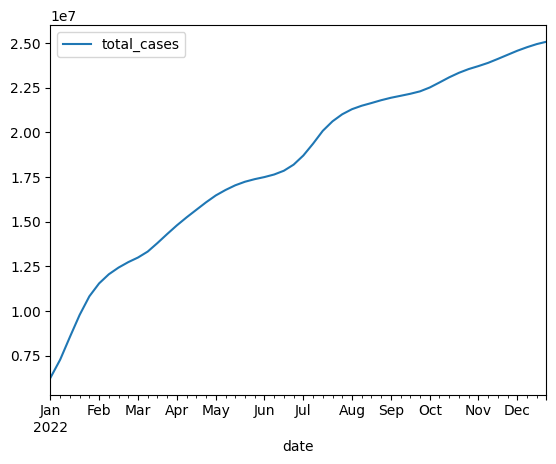

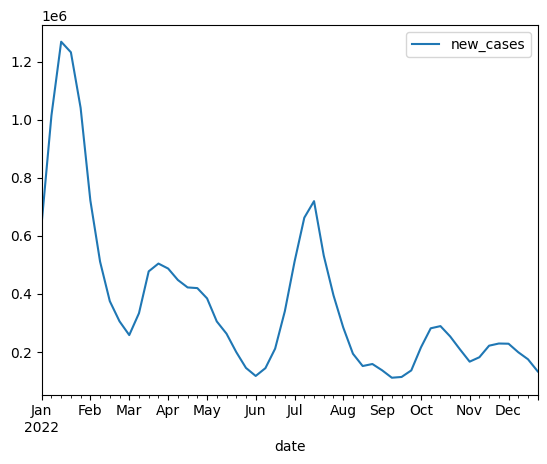

In [ ]:
#PUNTO3 
#dato che il punto 3, e anche i successivi, fanno riferimento a mesi e anni specifici, 
#preferisco creare tre colonne aggiuntive in cui estraggo in una il mese, in una l'anno, in una anche il giorno,
#dato che poi devo filtrare via i giorni senza misurazioni

df["Anno"] = df.loc[:, "date"].dt.year.astype("Int64") #ho convertito i float in interi con astype
df["Mese"] = df.loc[:, "date"].dt.month.astype("Int64")
df["Giorno"] = df.loc[:, "date"].dt.dayofweek.astype("Int64")

italia = df.loc[:, "location"] == "Italy" #creo un filtro per visualizzare i dati relativi solo all'Italia
df.loc[italia].sample(15)

#da un primo sguardo su 15 righe a caso, noto che i nuovi casi vengono registrati sempre nel giorno 6, Sabato
#è un'informazione che mi serve per poter filtrare i giorni

filtro_italia_22 = (df.loc[:, "Giorno"] == 6) & (df.loc[:, "Anno"] == 2022) & italia
dati_italia_22 = df.loc[filtro_italia_22]

dati_italia_22.plot(x="date", y="total_cases")
#ho messo sull'asse x la data completa, così da vedere l'evoluzione in tutto l'anno 
#ho messo sull'asse y i casi totali
#dal grafico si può vedere che c'è un andamento che aumenta esponenzialmente

dati_italia_22.plot(x="date", y="new_cases")
#per visualizzare il numero di nuovi casi rispetto alla data ho considerato la data completa e la colonna nuovi casi 
#dal grafico si vede che ci sono stati dei picchi alti a gennaio, marzo/aprile e luglio



<Axes: xlabel='location', ylabel='icu_patients'>

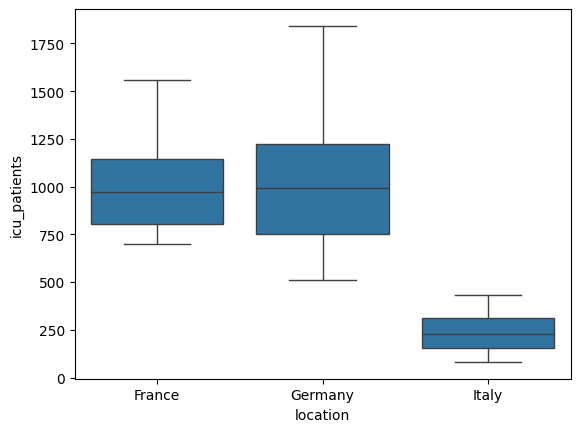

In [ ]:
#PUNTO 4 
#come nel punto 3, si fa riferimento a tre nazioni (Italia, Germania, Francia) e a un periodo di tempo
#il procedimento sarà simile al punto tre, ma c'è bisogno di fare una pulizia di dati nulli per la colonna icu_patients
#dato che all'inizio quando ho controllato tutti i dati nulli, per questa colonna, equivalgono al 90% 

#filtro nazioni 
germania = df.loc[:, "location"] == "Germany"
francia = df.loc[:, "location"] == "France"

filtro_nazioni = italia | germania | francia

#filtro periodo di tempo
maggio_aprile = (df.loc[:, "Mese"] >= 5) & (df.loc[:,"Anno"] == 2022) 
anno22_23 = (df.loc[:, "Mese"] <=4) & (df.loc[:, "Anno"] == 2023)

filtro_data = maggio_aprile | anno22_23

filtro_nazione_data = filtro_nazioni & filtro_data #unisco i due filtri per la data e per le nazioni 
dati_i_g_f= df.loc[filtro_nazione_data] 
#dataframe conclusivo che racchiude i dati di Italia, Germania e Francia dal Maggio 22 ad Aprile 23

#pulisco i dati nulli nei miei dati filtrati
dati_i_g_f = dati_i_g_f.dropna(subset=["icu_patients"])

sns.boxplot(data=dati_i_g_f, x="location", y="icu_patients")#grafico relativo ai pazienti in terapia intensiva
#dal grafico possiamo vedere che: 
#FRANCIA: il numero pazienti in ICU sono concentrati intorno ai 1000, con valore minimo a 750 circa e valore massimo a poco più di 1500
#GERMANIA: il numero pazienti in ICU sono concentrati intorno ai 1000, con valore minimo a 500 circa e valore massimo a poco più di 1750
#ITALIA:il numero pazienti in ICU sono concentrati intorno ai 250, con valore minimo a molto meno di 250 e valore massimo a circa 500

#l'italia è la nazione che ha avuto meno pazienti in ICU, mentre la germania è la nazione che ne ha avuti di più di tutti


location
France     6008717.0
Germany          0.0
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64
130729    24263.0
130730    24458.0
130731    24780.0
130732    24962.0
130733    24871.0
130734    24708.0
130735    24488.0
130736    24377.0
130737    24240.0
130738    24526.0
130739    24812.0
130740    24703.0
130741    24735.0
130742    24983.0
130743    25009.0
130744    24985.0
130745    25235.0
130746    25584.0
130747    25532.0
130748    25650.0
Name: hosp_patients, dtype: float64


0

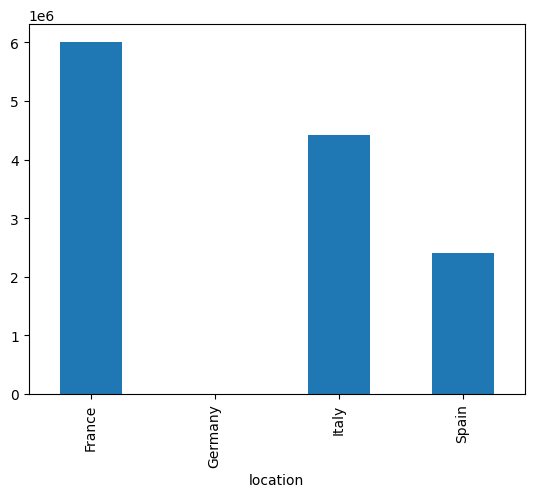

In [ ]:
#PUNTO5 
#ci sono similarità con i punti 3 e 4, per cui il procedimento sarà simile anch'esso

filtro_nazioni = italia | germania | francia #a questo filtro aggiungo la spagna

spagna = df.loc[:, "location"] == "Spain"
filtro_nazioni2 = italia | germania | francia | spagna

filtro_21 = df.loc[:, "Anno"] == 2021 #filtro per l'anno 2021

filtro_4_nazioni= filtro_nazioni2 & filtro_21

dati_4_nazioni = df.loc[filtro_4_nazioni]
dati_4_nazioni

gruppo_hosp = dati_4_nazioni.groupby("location")["hosp_patients"].sum()
#dopo aver filtrato bene i dati che mi servivano, raggruppo per nazione e sommo i valori dei pazienti ospedalizzati

print(gruppo_hosp) #dati numerici per ogni nazione dei pazienti ospedalizzati 
gruppo_hosp.plot(kind="bar") #grafico per ogni nazione dei pazienti ospedalizzati

#CONSIDERAZIONE DATI NULLI
print(dati_4_nazioni["hosp_patients"].head(20))
#stampo le prime venti righe per vedere che comportamento hanno le cifre degli hosp_patients

nulli_germ = germania & filtro_21
dati_nulli_germ = df.loc[nulli_germ]
dati_nulli_germ["hosp_patients"] #controllo i dati nulli in riferimento alla germania nel 2021, sembrano tutti NaN
dati_nulli_germ["hosp_patients"].nunique() #anche controllando con nunique(), non ci sono record ma solo nulli

#Dando un'occhiata alle prime 20 righe della colonna (per le 4 nazioni filtrate) si può vedere come i valori aumentano e diminuiscono ogni giorno,
#per cui si potrebbe effettuare un interpolate(), in modo tale da avere un valore intermedio tra il valore precedente e il valore successivo. 

#Questo, però, non vale per questo caso, dato che la Germania è interamente
#popolata da dati nulli, e non avendo neanche un record non si può fare un interpolate() su questa colonna.
#La miglior scelta è sicuramente quella di ignorare i dati nulli.
#Nel caso in cui, invece, la Germania avesse avuto pochi dati nulli, in quel caso secondo me un interpolate() poteva risolvere la situazione.
